# Binary Classification (Dogs vs. Cats)

In [17]:
from tensorflow import keras

2025-12-01 19:02:55.117157: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 19:02:55.139596: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-01 19:02:55.272000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-01 19:02:55.272716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 19:02:56.207299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Get Dataset Ready

In [13]:
import os, pathlib, shutil

base_dir = pathlib.Path("data/dogs-vs-cats")
kaggle_base_dir = pathlib.Path("data/kaggle")


## Split the Dataset to `train`, `valid`, and `test`.

In [14]:
# Let's define the train, valid, and test datasets
# 0 ~ 5999 for training: 6000 samples
# 6000 ~ 7999 for validation: 2000 samples
# 8000 ~ 9999 for testing: 2000 samples

# Create directories for the datasets


NUM_TRAIN = 6000
NUM_VALID = 2000
NUM_TEST = 2000

categories = ["cat", "dog"]
kaggle_data_directory = kaggle_base_dir / "train"
train_dir = base_dir / "train"
valid_dir = base_dir / "valid"
test_dir = base_dir / "test"

if not train_dir.exists():
    for category in categories:
        temp_train_dir = base_dir / "train" / f'{category}'
        temp_valid_dir = base_dir / "valid" / f'{category}'
        temp_test_dir = base_dir / "test" / f'{category}'

        os.makedirs(temp_train_dir)
        os.makedirs(temp_valid_dir)
        os.makedirs(temp_test_dir)



In [15]:
# Copy images to respective directories
num_samples = [ NUM_TRAIN, NUM_VALID, NUM_TEST ]
dirs = [ train_dir, valid_dir, test_dir ]

for dir in dirs:
    for category in categories:
        category_dir = dir / category
        # We assume the directory is created already
        start_index = 0
        if "valid" in str(dir):
            start_index = NUM_TRAIN
        elif "test" in str(dir):
            start_index = NUM_TRAIN + NUM_VALID

        for i in range(num_samples[dirs.index(dir)]):
            src = kaggle_data_directory / f"{category}.{start_index + i}.jpg"
            dst = category_dir / f"{category}.{start_index + i}.jpg"
            shutil.copyfile(src, dst)



## Create Dataset Objects

In [19]:
train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32,
)
valid_ds = keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=(180, 180),
    batch_size=32,
)
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32,
)


Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Data batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


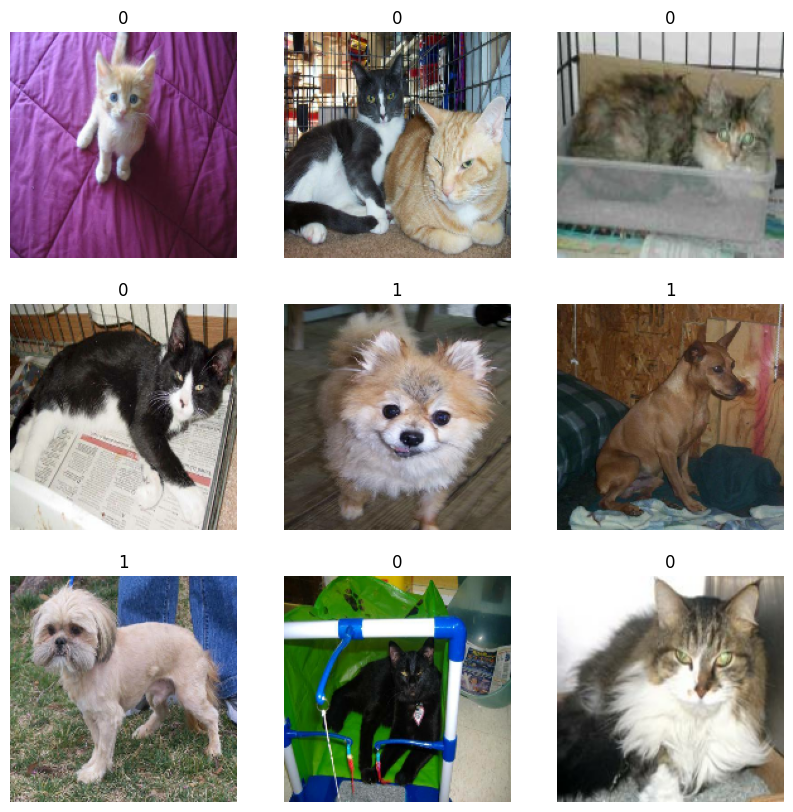

[0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1]


In [22]:
import matplotlib.pyplot as plt

for data_batch, labels in train_ds:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels.shape)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()
    print(labels.numpy())
    break

## Create a simple CNN model to train this Dogs vs. Cats

In [23]:
from tensorflow import keras


In [24]:
input_shape = (180, 180, 3)
num_classes = 2
model = keras.Sequential(
    [
        keras.layers.Rescaling(1./255, input_shape=input_shape),
        keras.layers.Conv2D(32, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(128, 3, activation='relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax'),
    ]
)

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/dogs-vs-cats/cnn_model_epoch{epoch:02d}_valacc{val_accuracy:.2f}.h5',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        mode='max',
        restore_best_weights=True,
    ),
    keras.callbacks.TensorBoard(log_dir='logs/dogs-vs-cats')
]


In [ ]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=50,
    callbacks=callbacks
)
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy:.2f}') 

Epoch 1/50
375/375 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.6419

2025-12-01 19:27:36.737407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]
2025-12-01 19:27:36.738027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]


375/375 [==============================] - 135s 358ms/step - loss: 0.6425 - accuracy: 0.6419 - val_loss: 0.6525 - val_accuracy: 0.6428
Epoch 2/50
375/375 [==============================] - 135s 359ms/step - loss: 0.5376 - accuracy: 0.7273 - val_loss: 0.5422 - val_accuracy: 0.7297
Epoch 3/50
375/375 [==============================] - 131s 350ms/step - loss: 0.4380 - accuracy: 0.7961 - val_loss: 0.5384 - val_accuracy: 0.7408
Epoch 4/50
 71/375 [====>.........................] - ETA: 1:31 - loss: 0.3623 - accuracy: 0.8385